In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from decimal import *
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

## Load and display MNIST handwritten digits dataset

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X = pixel values 0 to 256image, y = label
X = X / 255.

print('X.shape', X.shape)
print('y.shape', y.shape)

'''
Each row of X is a vectroization of an image of 28 x 28 = 784 pixels.  
The corresponding row of y holds the true class label from {0,1, .. , 9}.
'''

X.shape (70000, 784)
y.shape (70000,)


'\nEach row of X is a vectroization of an image of 28 x 28 = 784 pixels.  \nThe corresponding row of y holds the true class label from {0,1, .. , 9}.\n'

In [3]:
# see how many images are there for each digit
for j in np.arange(10):
    idx = np.where(y==str(j)) # returns index where y (label) = j
    idx = np.asarray(idx)[0,:]
    print('digit %i length %i' % (j, len(idx)))

digit 0 length 6903
digit 1 length 7877
digit 2 length 6990
digit 3 length 7141
digit 4 length 6824
digit 5 length 6313
digit 6 length 6876
digit 7 length 7293
digit 8 length 6825
digit 9 length 6958


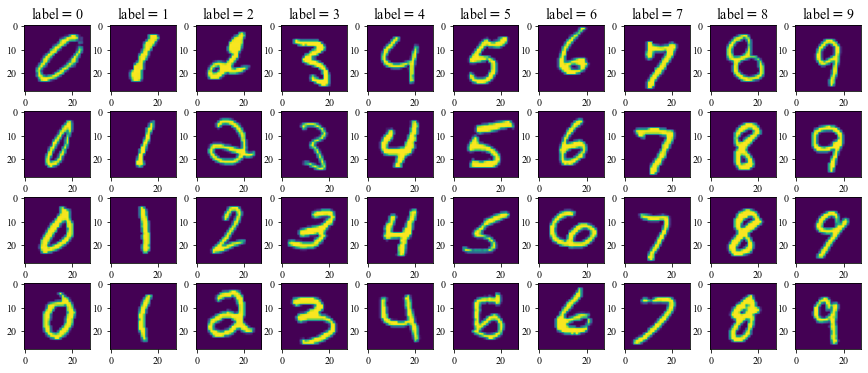

In [4]:
# Plot some sample images 
ncols = 10
nrows = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[15, 6.5]) # plot to hold subplots
for j in np.arange(ncols): # 0-9
    for i in np.arange(nrows): # 0-3
        idx = np.where(y==str(j)) # index of all images of digit 'j'
        idx = np.asarray(idx)[0,:] # make idx from tuple to array
        idx_subsampled = np.random.choice(idx, nrows) # sample nrow elts from idx
        ax[i,j].imshow(X[idx_subsampled[i],:].reshape(28,28)) # show image from pixel values
        # ax[i,j].title.set_text("label=%s" % y[idx_subsampled[j]]) 
        if i == 0:
            # ax[j,i].set_ylabel("label=%s" % y[idx_subsampled[j]]) 
            ax[i,j].set_title("label$=$%s" % y[idx_subsampled[i]], fontsize=14) 
        # ax[i].legend()
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.savefig('MNIST_ex1.pdf', bbox_inches='tight')

In [5]:
# Split the dataset into train and test sets
X_train = []
X_test = []
y_test = []
y_train = []
for i in np.arange(X.shape[0]):
    # for each example i, make it into train set with probabiliy 0.8 and into test set otherwise 
    U = np.random.rand() # Uniform([0,1]) variable
    if U<0.8:
        X_train.append(X[i,:])
        y_train.append(y[i])
    else:
        X_test.append(X[i,:])
        y_test.append(y[i])
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (55958, 784)
X_test.shape (14042, 784)
y_train.shape (55958,)
y_test.shape (14042,)


In [6]:
# same as above?
def sample_binary_MNIST(list_digits=['0','1'], full_MNIST=None):
    # get train and test set from MNIST of given two digits
    # e.g., list_digits = ['0', '1']
    if full_MNIST is not None:
        X, y = full_MNIST
    else:
        X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
        X = X / 255.

    idx = [i for i in np.arange(len(y)) if y[i] in list_digits] # list of indices where the label y is in list_digits
    
    X01 = X[idx,:]
    y01 = y[idx]

    X_train = []
    X_test = []
    y_test = [] # list of integers 0 and 1s
    y_train = [] # list of integers 0 and 1s

    for i in np.arange(X01.shape[0]):
        # for each example i, make it into train set with probabiliy 0.8 and into test set otherwise 
        U = np.random.rand() # Uniform([0,1]) variable
        label = 0
        if y01[i] == str(list_digits[1]):
            label = 1

        if U<0.8:
            X_train.append(X01[i,:])
            y_train.append(label)
        else:
            X_test.append(X01[i,:])
            y_test.append(label)

    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train).reshape(-1,1)
    y_test = np.asarray(y_test).reshape(-1,1)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test, sample_binary_MNIST(list_digits=['0','1'], full_MNIST=[X, y])
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (55958, 784)
X_test.shape (14042, 784)
y_train.shape (55958,)
y_test.shape (14042,)


## Logistic Regression

In [7]:
# sigmoid and logit function 
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

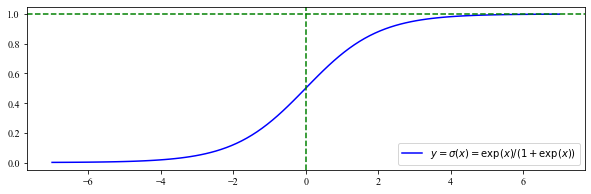

In [8]:
# plot sigmoid function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,3])
x = np.linspace(-7, 7, 100)
ax.plot(x, sigmoid(x), color='blue', label="$y=\sigma(x)=\exp(x)/(1+\exp(x))$")
plt.axhline(y=1, color='g', linestyle='--')
plt.axvline(x=0, color='g', linestyle='--')
ax.legend()
plt.savefig('sigmoid_ex.pdf', bbox_inches='tight')

In [9]:
def get_LR_loss(Y,H,W1):
    # H = phi in lecture notes
    p = H.shape[1] # 11866 columns of H
    l_LR = 0
    for j in range(p):
        H_j = H[:,j].reshape(-1,1)
        if H_j.T @ W1 > 100:
            val1 = H[:,j].T @ W1
        else:
            val1 = np.log(1+np.exp(H[:,j].T @ W1))
        l_LR += val1[0]
    val2 = Y.T @ H.T @ W1
    l_LR -= val2[0][0]
    return l_LR

In [10]:
def fit_LR_GD(Y, H, W0=None, sub_iter=100, stopping_diff=0.01):
        '''
        Convex optimization algorithm for Logistic Regression using Gradient Descent 
        Y = (n x 1), H = (p x n) (\Phi in lecture note), W = (p x 1)
        Logistic Regression: Y ~ Bernoulli(Q), Q = sigmoid(H.T @ W)
        MLE -->
        Find \hat{W} = argmin_W ( sum_j ( log(1+exp(H_j.T @ W) ) - Y.T @ H.T @ W ) )
        '''
        if W0 is None:
            W0 = np.random.rand(H.shape[0],1) #If initial coefficients W0 is None, randomly initialize (nrow x 1 coeffs) 
            
        W1 = W0.copy() # make copy to work with for GD
        i = 0
#         dist = 1
        grad = np.ones(W0.shape)# initialize gradient as 1's
        while (i < sub_iter) and (np.linalg.norm(grad) > stopping_diff):
            Q = 1/(1+np.exp(-H.T @ W1))  # probability matrix, same shape as Y
            grad = H @ (Q - Y)
            # eta = (np.log(i+1) / (((i + 1) ** (0.5))))
            i = i + 1 # prevent 1/0 for first iter
            lamb = 0.0001
            delta = 0
            eta = lamb * i ** - delta
            W1 = W1 - eta * grad # update weights 
            # calculate log reg loss
            l_LR = get_LR_loss(Y,H,W1)
            print('iter %i, l_LR %f' %(i,l_LR))
#             print('iter %i, grad_norm %f' %(i, np.linalg.norm(grad)))
        return W1

In [55]:
def fit_LR_NR(Y, H, W0=None, sub_iter=10, stopping_diff=0.01):
    '''
    Convex optimization algorithm for Logistic Regression using Newton-Ralphson algorithm. 
    Y = (n x 1), H = (p x n) (\Phi in lecture note), W = (p x 1)
    Logistic Regression: Y ~ Bernoulli(Q), Q = sigmoid(H.T @ W)
    MLE -->
    Find \hat{W} = argmin_W ( sum_j ( log(1+exp(H_j.T @ W) ) - Y.T @ H.T @ W ) ) 
    '''
    if W0 is None:
        W0 = np.random.rand(H.shape[0],1) #If initial coefficients W0 is None, randomly initialize (nrow x 1 coeffs) 

    W1 = W0.copy() # make copy to work with for GD
    i = 0
    grad = np.ones(W0.shape)# initialize gradient as 1's
    while (i < sub_iter) and (np.linalg.norm(grad) > stopping_diff):
        Q = 1/(1+np.exp(-H.T @ W1)) # probability matrix, same shape as Y
        Q = Q.reshape(Q.shape[0],-1)
        grad = H @ (Q - Y)
        Q2 = np.subtract(1.0,Q) # (1-p_i)
        d = np.multiply(Q,Q2) # p_i(1-p_i)
        # diag takes a 1D array as input
        D = np.diag(d.flatten()) # diagonal matrix D with diagonal entries p_i(1-p_i)
        hess = H @ D @ H.T 
        # D is rounding small values to 0, so use psuedoinverse pinv()
        W1 = W1 - np.linalg.pinv(hess) @ grad # update weights
        # calculate log reg loss
        l_LR = get_LR_loss(Y,H,W1)
        i = i + 1
        print('iter %i, l_LR %f' %(i,l_LR))
    return W1

In [58]:
# fit logistic regression using NR

X_train, X_test, y_train, y_test = sample_binary_MNIST(['0', '1'], full_MNIST = [X,y])
# Feature matrix of size (p x n) = (feature dim x samples)
H_train = np.vstack((np.ones(X_train.shape[0]), X_train.T))  # add first row of 1's for bias features 

W = fit_LR_NR(Y=y_train, H=H_train/10) # divide by large number so Hessian is nonsingular -> invertible
plt.imshow(W[1:,:].reshape(28,28))

iter 1, l_LR 834791097800163196928.000000


<ipython-input-55-f6b8ac8c15ff>:16: RuntimeWarning: overflow encountered in exp
  Q = 1/(1+np.exp(-H.T @ W1)) # probability matrix, same shape as Y


iter 2, l_LR 834791097800163196928.000000


KeyboardInterrupt: 

iter 1, l_LR 165375.298405
iter 2, l_LR 2951.163659
iter 3, l_LR 1637.460952
iter 4, l_LR 1277.440158
iter 5, l_LR 1061.408440
iter 6, l_LR 914.123664
iter 7, l_LR 806.848323
iter 8, l_LR 725.168619
iter 9, l_LR 660.863535
iter 10, l_LR 608.868249
iter 11, l_LR 565.899321
iter 12, l_LR 529.738131
iter 13, l_LR 498.832343
iter 14, l_LR 472.064895
iter 15, l_LR 448.613479
iter 16, l_LR 427.860890
iter 17, l_LR 409.335715
iter 18, l_LR 392.672112
iter 19, l_LR 377.582013
iter 20, l_LR 363.835585
iter 21, l_LR 351.247259
iter 22, l_LR 339.665552
iter 23, l_LR 328.965545
iter 24, l_LR 319.043236
iter 25, l_LR 309.811261
iter 26, l_LR 301.195608
iter 27, l_LR 293.133076
iter 28, l_LR 285.569289
iter 29, l_LR 278.457133
iter 30, l_LR 271.755510
iter 31, l_LR 265.428354
iter 32, l_LR 259.443826
iter 33, l_LR 253.773680
iter 34, l_LR 248.392738
iter 35, l_LR 243.278469
iter 36, l_LR 238.410638
iter 37, l_LR 233.771019
iter 38, l_LR 229.343152
iter 39, l_LR 225.112136
iter 40, l_LR 221.064456
it

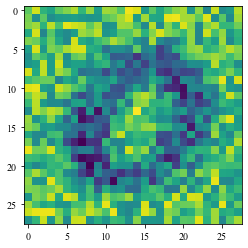

In [46]:
# fit logistic regression using GD

X_train, X_test, y_train, y_test = sample_binary_MNIST(['0', '1'], full_MNIST = [X,y])
# Feature matrix of size (p x n) = (feature dim x samples)
H_train = np.vstack((np.ones(X_train.shape[0]), X_train.T))  # add first row of 1's for bias features 
W = fit_LR_GD(Y=y_train, H=H_train) 

plt.imshow(W[1:,:].reshape(28,28))

<ipython-input-12-bc137350619c>:17: RuntimeWarning: overflow encountered in exp
  Q = 1/(1+np.exp(-H.T @ W1))  # probability matrix, same shape as Y


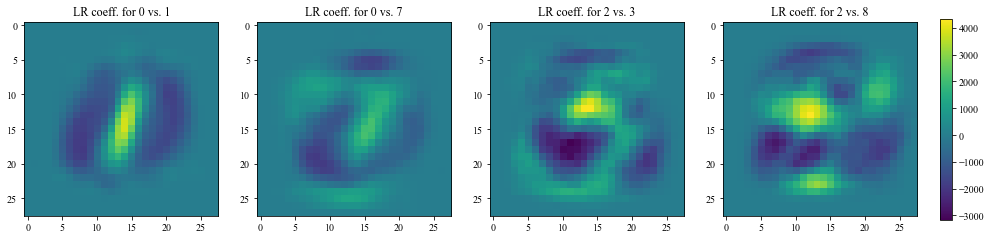

In [135]:
# plot fitted polynomial regression curve
digit_list_list = [['0','1'],['0','7'],['2','3'],['2', '8']] # list of list of two digits
# fit LR for each cases
W_array = []
for i in np.arange(len(digit_list_list)):
    L = digit_list_list[i]
    X_train, X_test, y_train, y_test = sample_binary_MNIST(list_digits=L, full_MNIST = [X,y])
    H_train = np.vstack((np.ones(X_train.shape[0]), X_train.T))  # add first row of 1's for bias features 
    W = fit_LR_GD(Y=y_train, H=H_train) 
    W = fit_LR_GD(Y=y_train, H=H_train) 
    W_array.append(W.copy())

W_array = np.asarray(W_array)


# make plot
fig, ax = plt.subplots(nrows=1, ncols=len(digit_list_list), figsize=[16, 4])
for i in np.arange(len(digit_list_list)):
    L = digit_list_list[i]
    W = W_array[i]
    im = ax[i].imshow(W[1:,:].reshape(28,28), vmin=np.min(W_array), vmax=np.max(W_array))
    ax[i].title.set_text("LR coeff. for %s vs. %s" % (L[0], L[1])) 
    # ax[i].legend()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('LR_MNIST_training_ex.pdf', bbox_inches='tight')

In [167]:
def compute_accuracy_metrics(Y_test, P_pred, use_opt_threshold=False):
    # y_test = binary label 
    # Q = predicted probability for y_test
    # compuate various binary classification accuracy metrics
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, P_pred, pos_label=None)
    mythre = thresholds[np.argmax(tpr - fpr)]
    myauc = metrics.auc(fpr, tpr)
    # print('!!! auc', myauc)
    
    # Compute classification statistics
    threshold = 0.5
    if use_opt_threshold:
        threshold = mythre
    
    Y_pred = Q.copy()
    Y_pred[Y_pred < threshold] = 0
    Y_pred[Y_pred >= threshold] = 1

    mcm = confusion_matrix(Y_test, Y_pred)
    tn = mcm[0, 0]
    tp = mcm[1, 1]
    fn = mcm[1, 0]
    fp = mcm[0, 1]

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tn / (tn + fp)
    specificity = tp / (tp + fn)
    precision = tp / (tp + fp)
    fall_out = fp / (fp + tn)
    miss_rate = fn / (fn + tp)

    # Save results
    results_dict = {}
    results_dict.update({'Y_test': Y_test})
    results_dict.update({'Y_pred': Y_pred})
    results_dict.update({'AUC': myauc})
    results_dict.update({'Opt_threshold': mythre})
    results_dict.update({'Accuracy': accuracy})
    results_dict.update({'Sensitivity': sensitivity})
    results_dict.update({'Specificity': specificity})
    results_dict.update({'Precision': precision})
    results_dict.update({'Fall_out': fall_out})
    results_dict.update({'Miss_rate': miss_rate})
    return results_dict

<ipython-input-12-bc137350619c>:17: RuntimeWarning: overflow encountered in exp
  Q = 1/(1+np.exp(-H.T @ W1))  # probability matrix, same shape as Y


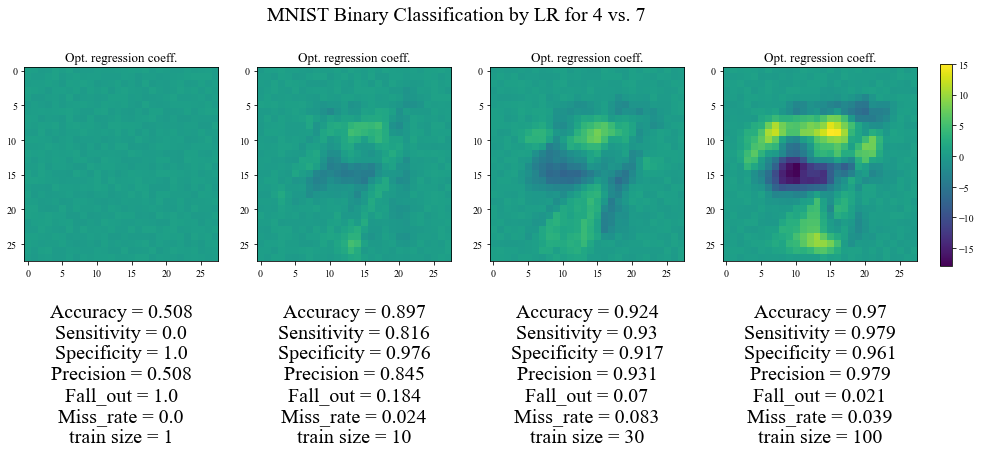

In [172]:
# fit logistic regression using GD and compute binary classification accuracies

# Get train and test data 
digits_list = ['4', '7']
X_train, X_test, y_train, y_test = sample_binary_MNIST(digits_list, full_MNIST = [X,y])
# Feature matrix of size (p x n) = (feature dim x samples)

list_train_size = [1,10, 30, 100]

# train the regression coefficients for all cases
W_list = []
results_list = []

for i in np.arange(len(list_train_size)):
    size = list_train_size[i]
    idx = np.random.choice(np.arange(len(y_train)), size)
    X_train0 = X_train[idx, :]
    y_train0 = y_train[idx]

    # Train the logistic regression model 
    H_train0 = np.vstack((np.ones(X_train0.shape[0]), X_train0.T))  # add first row of 1's for bias features 
    W = fit_LR_GD(Y=y_train0, H=H_train0) 
    W_list.append(W.copy()) # make sure use copied version of W since the same name is overrided in the loop 

    # Get predicted probabilities 
    H_test = np.vstack((np.ones(X_test.shape[0]), X_test.T))
    Q = 1 / (1 + np.exp(-H_test.T @ W)) # predicted probabilities for y_test

    # Compute binary classification accuracies
    results_dict = compute_accuracy_metrics(Y_test=y_test, P_pred = Q)
    results_dict.update({'train size':X_train0.shape[0]})  # add the train data size to the results dictionary
    results_list.append(results_dict.copy())
   
    # Print out the results 
    """
    keys_list = [i for i in results_dict.keys()]
    for key in keys_list:
        if key not in ['Y_test', 'Y_pred']:
            print('%s = %f' % (key, results_dict.get(key)))
    """

# make plot
fig, ax = plt.subplots(nrows=1, ncols=len(list_train_size), figsize=[16, 4])

for i in np.arange(len(list_train_size)):
    result_dict = results_list[i]
    W = W_list[i][1:,:] 
    im = ax[i].imshow(W.copy().reshape(28,28), vmin=np.min(W_list), vmax=np.max(W_list))
    
    subtitle = ""
    keys_list = [i for i in results_list[i].keys()]
    for key in keys_list:
        if key not in ['Y_test', 'Y_pred', 'AUC', 'Opt_threshold']:
            subtitle += "\n" + str(key) + " = " + str(np.round(results_list[i].get(key),3))
            # print('%s = %f' % (key, results_list[i].get(key)))
            
    ax[i].set_title('Opt. regression coeff.', fontsize=13) 
    ax[i].set_xlabel(subtitle, fontsize=20) 

fig.subplots_adjust(right=0.9)
fig.suptitle("MNIST Binary Classification by LR for %s vs. %s" % (digits_list[0], digits_list[1]), fontsize=20, y=1.05)
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('LR_MNIST_test_ex1.pdf', bbox_inches='tight')
    